In [1]:
# Dependencies
import psycopg2
import pandas as pd
from password import params
import matplotlib.pyplot as plt

In [2]:
# Pass in parameters from password and set connection with psycopg2
connection = psycopg2.connect(**params)

In [3]:
# Create Salary DataFrame by querying the database
salary_df = pd.read_sql_query('SELECT * FROM "Salary";', con = connection)

In [4]:
# Get Median Salary of Employees
medianSalary = salary_df['salary'].median()

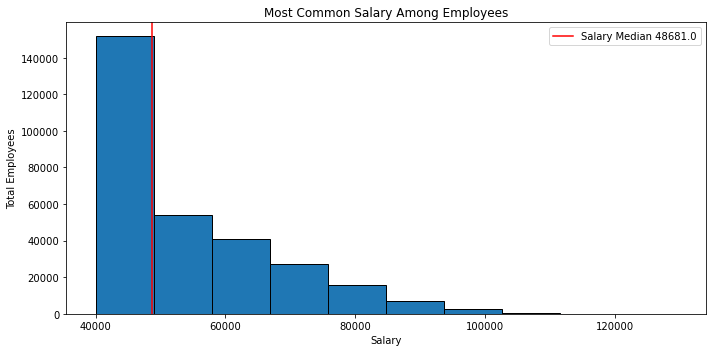

In [5]:
# Graph a histogram with median salary of Employees and Emplyees' Salary
plt.figure(figsize=(10,5))
plt.axvline(medianSalary, color ='Red', label=f'Salary Median {medianSalary}')
plt.legend()
plt.hist(salary_df['salary'], edgecolor='black')
plt.title ('Most Common Salary Among Employees')
plt.xlabel('Salary')
plt.ylabel('Total Employees')
plt.tight_layout()
plt.savefig('Images/Most Common Salary Among Employees.png')

plt.show()

In [6]:
# Query tables to get desire parameters
selection = 'SELECT t.title, s.salary FROM "Titles" as t INNER JOIN "Employees" as emp ON t.title_id = emp.emp_title_id INNER JOIN "Salary" as s ON emp.emp_no = s.emp_no'

In [7]:
# Select title and salary from tables Titles, Employees and Salary
salary_title_df = pd.read_sql_query(selection, con = connection)

# Group by title and get average salary in sorted values
meanSalary_by_title = salary_title_df.groupby('title').mean()
meanSalary_by_title = meanSalary_by_title.sort_values('salary', ascending=False)

In [8]:
# Show DataFrame
meanSalary_by_title

,salary
title,
Senior Staff,58550.172704
Staff,58465.382850
Manager,51531.041667
Technique Leader,48582.896092
Assistant Engineer,48564.434447
Engineer,48535.336511
Senior Engineer,48506.799871


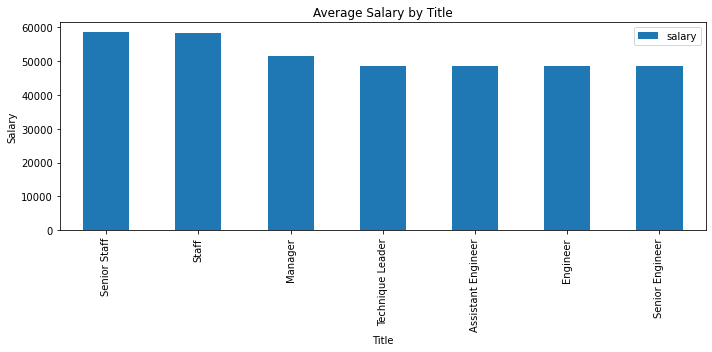

In [9]:
# Create a bar chart of average salary by title
meanSalary_by_title.plot(kind='bar', title = "Average Salary by Title", xlabel="Title", ylabel='Salary', figsize=(10,5))
plt.tight_layout()
plt.savefig('Images/Average Salary by Title.png')
plt.show()